# Simulation of Animal Learning with a policy $\pi_{t}(a|s) \propto \exp(\beta Q_{a,s}(t) + b_{a})$

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility note:
# We fix a seed so that the same notebook run produces the same synthetic dataset,
# which makes the demo easier to verify and discuss.
SEED = 0
rng = np.random.default_rng(SEED)

from RLModelLatest_BiasInBoltxFact import SyntheticDATA_Generator_constantModel_rev


### Defining Synthetic Task

In [20]:
# In this demo we define a minimal "tone → action → reward" task with three actions:
#   L = left, R = right, N = no response.
# The generator will sample states and actions, then draw rewards from reward_probs.

state_space  = ["6kHz", "10kHz"]
action_space = ["L", "R", "N"]

# Reward probabilities P(reward=1 | state, action).
# Here 6kHz mostly rewards L, and 10kHz mostly rewards R; "N" never pays out.
reward_probs = {
    ("6kHz",  "L"): 0.9, ("6kHz",  "R"): 0.1, ("6kHz",  "N"): 0.0,
    ("10kHz", "L"): 0.1, ("10kHz", "R"): 0.9, ("10kHz", "N"): 0.0,
}

# The simulator’s reversal trigger uses a notion of “correctness”.
# For the demo, we define an action as “correct” if its reward probability > 0.5.
correct_pairs = {k: (1 if v > 0.5 else 0) for k, v in reward_probs.items()}

def compute_correct(state, action):
    """Return 1 if (state, action) is defined as 'correct' in this demo."""
    return int(correct_pairs.get((state, action), 0) == 1)



### Running One Simulation 

In [21]:
# In this section, you choose a single parameter setting (alpha, beta, biases)
# and generate one synthetic session. This gives you a baseline run to inspect.

a   = 0.15   # learning rate (alpha): higher = faster learning, more volatility
b   = 4.0    # inverse temperature (beta): higher = more deterministic choices
b_L = 2
b_R = 1
b_N = 1.5   # positive bias encourages "N" (no-response)

trials = 2000

sim = SyntheticDATA_Generator_constantModel_rev(
    a=a, b=b, b_L=b_L, b_R=b_R, b_N=b_N,
    trials=trials,
    past_states=[], past_actions=[], past_rewards=[],
    state_space=state_space,
    action_space=action_space,
    reward_probs=reward_probs,
    correct_pairs=correct_pairs,
    reversal_countdown=250,   # after triggering, wait this many trials before flipping
    perf_window=20,           # performance window for trigger check
    perf_threshold=19         # trigger if >=19 correct out of last 20
)

states, actions, rewards, reversal_trials, last_k_correct = sim.generate()

# We assemble the trial-by-trial output into a table so it’s easy to inspect and plot.
df = pd.DataFrame({
    "t": np.arange(1, len(states) + 1),
    "state": states,
    "action": actions,
    "reward": rewards,
})

# “Correct” is defined by our demo mapping above (not by the experimental dataset).
df["correct"] = [compute_correct(s, a) for s, a in zip(df["state"], df["action"])]

print("Reversal marker trials (if any):", reversal_trials)
df.head()



🔔 Rule reversal trigger at trial 63 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 425 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 740 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 1044 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 1378 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 1680 (≥19/20 correct).

🔄 Rule reversal applied!
Reversal marker trials (if any): [63, 425, 740, 1044, 1378, 1680]


,t,state,action,reward,correct
0,1,6kHz,L,1,1
1,2,10kHz,L,0,0
2,3,10kHz,N,0,0
3,4,6kHz,L,1,1
4,5,6kHz,L,1,1


### Plots (Accuracies + Action Frequencies)

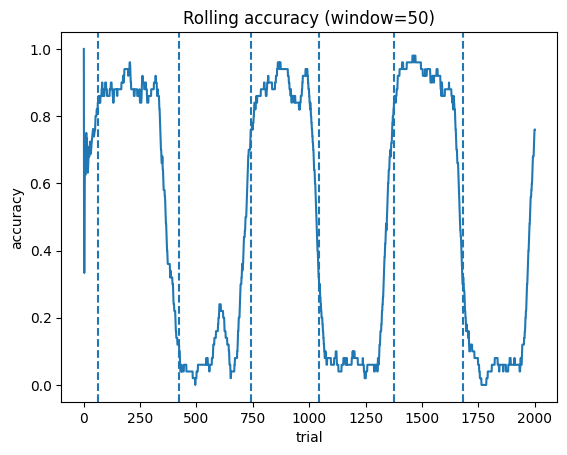

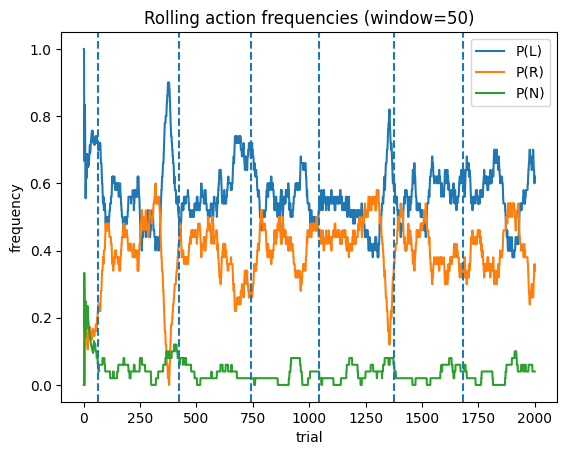

In [22]:
# These plots are meant for a quick, intuitive read:
#   (1) rolling accuracy — does the agent learn?
#   (2) rolling action frequencies — does choice behavior shift over time?

# These plots are meant for a quick, intuitive read:
#   (1) rolling accuracy — does the agent learn?
#   (2) rolling action frequencies — does choice behavior shift over time?

win = 50
df["acc_roll"] = df["correct"].rolling(win, min_periods=1).mean()

plt.figure()
plt.plot(df["t"], df["acc_roll"])
for rt in reversal_trials:
    plt.axvline(rt, linestyle="--")
plt.title(f"Rolling accuracy (window={win})")
plt.xlabel("trial")
plt.ylabel("accuracy")
plt.show()

for a_name in action_space:
    df[f"p_{a_name}"] = (df["action"] == a_name).rolling(win, min_periods=1).mean()

plt.figure()
plt.plot(df["t"], df["p_L"], label="P(L)")
plt.plot(df["t"], df["p_R"], label="P(R)")
plt.plot(df["t"], df["p_N"], label="P(N)")
for rt in reversal_trials:
    plt.axvline(rt, linestyle="--")
plt.title(f"Rolling action frequencies (window={win})")
plt.xlabel("trial")
plt.ylabel("frequency")
plt.legend()
plt.show()


### Parameter Sweep demo


🔔 Rule reversal trigger at trial 118 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 23 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 345 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 756 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 1088 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 39 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 376 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 626 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 876 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 1222 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 1472 (≥19/20 correct).

🔔 Rule reversal trigger at trial 28 (≥19/20 correct).

🔄 Rule reversal applied!

🔔 Rule reversal trigger at trial 278 (≥19

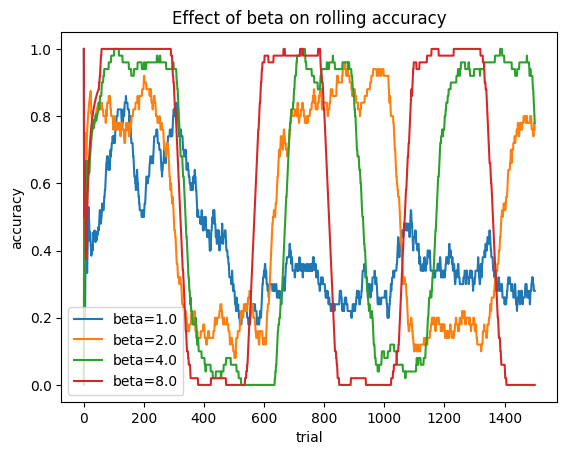

In [23]:
# In this section, you vary ONE parameter (beta) and re-run the simulation.
# The goal is to demonstrate interpretability: how does beta affect behavior?

def run_once(seed, a=0.15, b=4.0, b_L=0.0, b_R=0.0, b_N=-2.0, trials=1500):
    # Some generators rely on np.random internally, so we also seed NumPy here.
    np.random.seed(seed)

    sim = SyntheticDATA_Generator_constantModel_rev(
        a=a, b=b, b_L=b_L, b_R=b_R, b_N=b_N,
        trials=trials,
        past_states=[], past_actions=[], past_rewards=[],
        state_space=state_space,
        action_space=action_space,
        reward_probs=reward_probs,
        correct_pairs=correct_pairs,
        reversal_countdown=250,
        perf_window=20,
        perf_threshold=19
    )

    states, actions, rewards, reversal_trials, _ = sim.generate()
    df = pd.DataFrame({"t": np.arange(1, len(states)+1), "state": states, "action": actions, "reward": rewards})
    df["correct"] = [compute_correct(s, a) for s, a in zip(df["state"], df["action"])]
    df["acc_roll"] = df["correct"].rolling(50, min_periods=1).mean()
    return df, reversal_trials

betas = [1.0, 2.0, 4.0, 8.0]
results = {}

for bb in betas:
    df_bb, rev_bb = run_once(seed=SEED, b=bb)
    results[bb] = (df_bb, rev_bb)

plt.figure()
for bb, (df_bb, rev_bb) in results.items():
    plt.plot(df_bb["t"], df_bb["acc_roll"], label=f"beta={bb}")
plt.title("Effect of beta on rolling accuracy")
plt.xlabel("trial")
plt.ylabel("accuracy")
plt.legend()
plt.show()


# Model Parameter Estimates Near First Reversal for Wildtype (WT) and 16p11.2 deletion-carrier (16p) mice ($n_{WT}=5$, $n_{16p}=5$)

In [ ]:
# ---- storing results in memory, separated by mousetype ----
param_estimates = {"WT": {}, "16p": {}}   # mousetype -> (tag -> DataFrame)

# WT mice ($n_{WT}=5$)

In [2]:
from RLModelLatest_BiasInBoltxFact import ModelParameterEstimatesFromSAR_rev
from RLModelLatest_BiasInBoltxFact import MouseDataLoader

import os
import pandas as pd
from unittest.mock import patch  # to bypass loader's input()

# ---- paths ----
BASE_PATH = "/Volumes/SacadsProjects/ProjectAutism/ExperimentalData"

# Your WT rev files (order matters)
filesWT = [
    'mouse_data_6150_WT_rev_prob.csv',
    'mouse_data_6210_WT_rev_prob.csv',
    'mouse_data_6211_WT_rev_prob.csv',
    'mouse_data_6240_WT_rev_prob.csv',
    'mouse_data_6242_WT_rev_prob.csv']
'''[
    'mouse_data_6558_WT_var_prob.csv',
    'mouse_data_6560_WT_var_prob.csv',
    'mouse_data_6564_WT_var_prob.csv',
    'mouse_data_6565_WT_var_prob.csv',
    'mouse_data_6566_WT_var_prob.csv',
    'mouse_data_6571_WT_var_prob.csv',
    'mouse_data_6723_WT_var_prob.csv'
]'''
files16p = [
    'mouse_data_6149_16p11.2_rev_prob.csv',
    'mouse_data_6212_16p11.2_rev_prob.csv',
    'mouse_data_6213_16p11.2_rev_prob.csv',
    'mouse_data_6244_16p11.2_rev_prob.csv',
    'mouse_data_6344_16p11.2_rev_prob.csv']
'''[
    'mouse_data_6557_16p11.2_var_prob.csv',
    'mouse_data_6561_16p11.2_var_prob.csv',
    'mouse_data_6562_16p11.2_var_prob.csv',
    'mouse_data_6563_16p11.2_var_prob.csv',
    'mouse_data_6569_16p11.2_var_prob.csv',
    'mouse_data_6722_16p11.2_var_prob.csv',
    'mouse_data_6725_16p11.2_var_prob.csv',
    'mouse_data_6730_16p11.2_var_prob.csv',
    'mouse_data_6732_16p11.2_var_prob.csv',
    'mouse_data_6735_16p11.2_var_prob.csv'
]'''

mousetype = input("Enter mouse type ('WT' or '16p'): ").strip()
files = filesWT if mousetype == 'WT' else files16p

def params_to_df(ALPHAS, BETAS, BL, BR, BN, COLORS):
    return pd.DataFrame({
        "window_idx": range(len(ALPHAS)),
        "alpha": ALPHAS,
        "beta": BETAS,
        "bias_L": BL,
        "bias_R": BR,
        "bias_N": BN,
        "color": COLORS
    })


for idx, fname in enumerate(files):
    print(f"▶︎ Processing (real mode): {fname} (index {idx})")

    # 1) build loader WITHOUT interaction by faking the input prompt
    # (patching builtins.input is the standard approach) :contentReference[oaicite:1]{index=1}
    with patch('builtins.input', return_value=str(idx)):
        data_extractor = MouseDataLoader(
            data_type="real",
            protocol="rev",
            group_or_model=mousetype,
            base_path=BASE_PATH
        )

    # 2) point loader to YOUR exact file list and re-assert the index
    data_extractor.links = files[:]
    data_extractor.mouse_num = idx

    # 3) run estimator
    mm = ModelParameterEstimatesFromSAR_rev(
        realOrSim="real",
        l=400, w=1,
        full_states=[], full_actions=[], full_rewards=[],
        reversal_trials=[],
        protocol="rev",
        mouse_type=mousetype,
        data_loader=data_extractor
    )

    ALPHAS, BETAS, BL, BR, BN, COLORS = mm.estimator()

    # 4) create a stable tag (mouse id) and store DataFrame in dict
    try:
        mouse_id = fname.split("_")[2]
        tag = f"mouse_{mouse_id}"
    except Exception:
        tag = os.path.splitext(fname)[0]

    df = params_to_df(ALPHAS, BETAS, BL, BR, BN, COLORS)
    param_estimates[mousetype][tag] = df

    print(f"✅ Stored estimates: param_estimates['{mousetype}']['{tag}']  (rows={len(df)})")




▶︎ Processing (real mode): mouse_data_6150_WT_rev_prob.csv (index 0)
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6150_WT_rev_prob.csv
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6150_WT_rev_prob.csv
✅ Stored estimates: param_estimates['WT']['mouse_6150']  (rows=4067)
▶︎ Processing (real mode): mouse_data_6210_WT_rev_prob.csv (index 1)
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6210_WT_rev_prob.csv
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6210_WT_rev_prob.csv
✅ Stored estimates: param_estimates['WT']['mouse_6210']  (rows=4172)
▶︎ Processing (real mode): mouse_data_6211_WT_rev_prob.csv (index 2)
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6211_WT_rev_prob.csv
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6211_WT_rev_prob.csv
✅ Stored estimates: param_estimates['

# 16p mice ($n_{16p}=5$)

In [3]:
from RLModelLatest_BiasInBoltxFact import ModelParameterEstimatesFromSAR_rev
from RLModelLatest_BiasInBoltxFact import MouseDataLoader

import os
import pandas as pd
from unittest.mock import patch  # to bypass loader's input()

# ---- paths ----
BASE_PATH = "/Volumes/SacadsProjects/ProjectAutism/ExperimentalData"

# Your WT rev files (order matters)
filesWT = [
    'mouse_data_6150_WT_rev_prob.csv',
    'mouse_data_6210_WT_rev_prob.csv',
    'mouse_data_6211_WT_rev_prob.csv',
    'mouse_data_6240_WT_rev_prob.csv',
    'mouse_data_6242_WT_rev_prob.csv']
'''[
    'mouse_data_6558_WT_var_prob.csv',
    'mouse_data_6560_WT_var_prob.csv',
    'mouse_data_6564_WT_var_prob.csv',
    'mouse_data_6565_WT_var_prob.csv',
    'mouse_data_6566_WT_var_prob.csv',
    'mouse_data_6571_WT_var_prob.csv',
    'mouse_data_6723_WT_var_prob.csv'
]'''
files16p = [
    'mouse_data_6149_16p11.2_rev_prob.csv',
    'mouse_data_6212_16p11.2_rev_prob.csv',
    'mouse_data_6213_16p11.2_rev_prob.csv',
    'mouse_data_6244_16p11.2_rev_prob.csv',
    'mouse_data_6344_16p11.2_rev_prob.csv']
'''[
    'mouse_data_6557_16p11.2_var_prob.csv',
    'mouse_data_6561_16p11.2_var_prob.csv',
    'mouse_data_6562_16p11.2_var_prob.csv',
    'mouse_data_6563_16p11.2_var_prob.csv',
    'mouse_data_6569_16p11.2_var_prob.csv',
    'mouse_data_6722_16p11.2_var_prob.csv',
    'mouse_data_6725_16p11.2_var_prob.csv',
    'mouse_data_6730_16p11.2_var_prob.csv',
    'mouse_data_6732_16p11.2_var_prob.csv',
    'mouse_data_6735_16p11.2_var_prob.csv'
]'''

mousetype = input("Enter mouse type ('WT' or '16p'): ").strip()
files = filesWT if mousetype == 'WT' else files16p

def params_to_df(ALPHAS, BETAS, BL, BR, BN, COLORS):
    return pd.DataFrame({
        "window_idx": range(len(ALPHAS)),
        "alpha": ALPHAS,
        "beta": BETAS,
        "bias_L": BL,
        "bias_R": BR,
        "bias_N": BN,
        "color": COLORS
    })


for idx, fname in enumerate(files):
    print(f"▶︎ Processing (real mode): {fname} (index {idx})")

    # 1) build loader WITHOUT interaction by faking the input prompt
    # (patching builtins.input is the standard approach) :contentReference[oaicite:1]{index=1}
    with patch('builtins.input', return_value=str(idx)):
        data_extractor = MouseDataLoader(
            data_type="real",
            protocol="rev",
            group_or_model=mousetype,
            base_path=BASE_PATH
        )

    # 2) point loader to YOUR exact file list and re-assert the index
    data_extractor.links = files[:]
    data_extractor.mouse_num = idx

    # 3) run estimator
    mm = ModelParameterEstimatesFromSAR_rev(
        realOrSim="real",
        l=400, w=1,
        full_states=[], full_actions=[], full_rewards=[],
        reversal_trials=[],
        protocol="rev",
        mouse_type=mousetype,
        data_loader=data_extractor
    )

    ALPHAS, BETAS, BL, BR, BN, COLORS = mm.estimator()

    # 4) create a stable tag (mouse id) and store DataFrame in dict
    try:
        mouse_id = fname.split("_")[2]
        tag = f"mouse_{mouse_id}"
    except Exception:
        tag = os.path.splitext(fname)[0]

    df = params_to_df(ALPHAS, BETAS, BL, BR, BN, COLORS)
    param_estimates[mousetype][tag] = df

    print(f"✅ Stored estimates: param_estimates['{mousetype}']['{tag}']  (rows={len(df)})")

▶︎ Processing (real mode): mouse_data_6149_16p11.2_rev_prob.csv (index 0)
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6149_16p11.2_rev_prob.csv
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6149_16p11.2_rev_prob.csv
✅ Stored estimates: param_estimates['16p']['mouse_6149']  (rows=3618)
▶︎ Processing (real mode): mouse_data_6212_16p11.2_rev_prob.csv (index 1)
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6212_16p11.2_rev_prob.csv
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6212_16p11.2_rev_prob.csv
✅ Stored estimates: param_estimates['16p']['mouse_6212']  (rows=3574)
▶︎ Processing (real mode): mouse_data_6213_16p11.2_rev_prob.csv (index 2)
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6213_16p11.2_rev_prob.csv
✅ Loading file: /Volumes/SacadsProjects/ProjectAutism/ExperimentalData/mouse_data_6213_16p11.2_rev

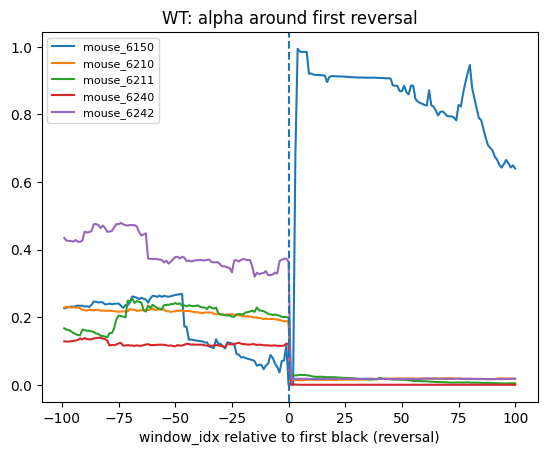

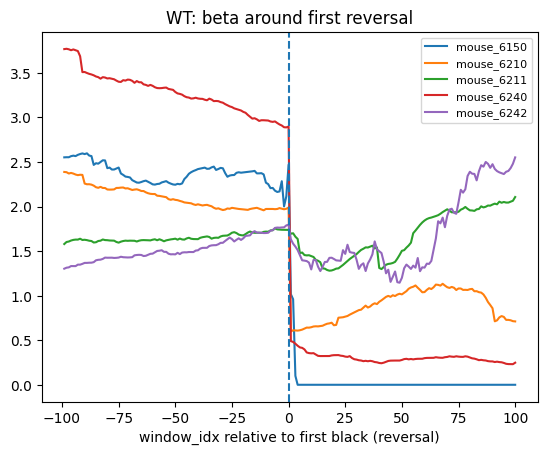

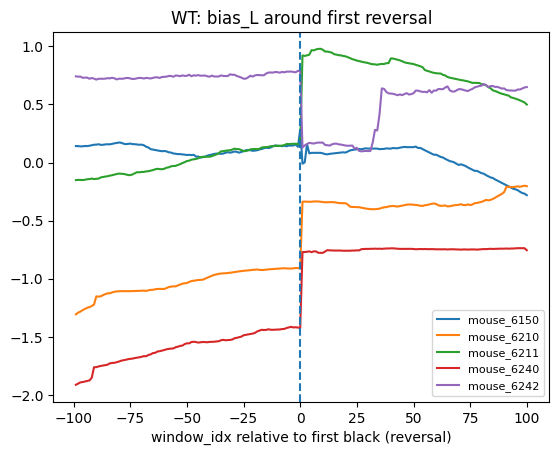

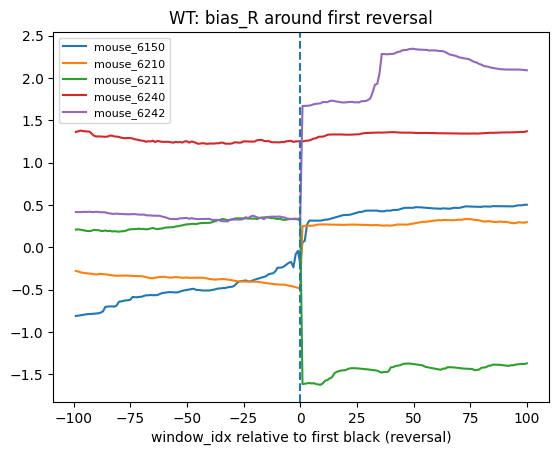

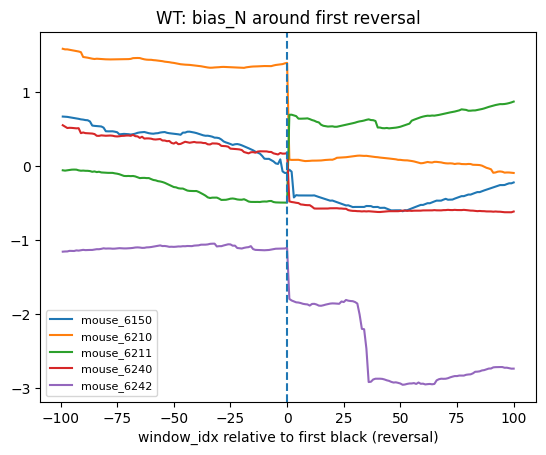

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BEFORE = 99
AFTER  = 100
REL_INDEX = pd.Index(range(-BEFORE, AFTER + 1), name="rel_idx")

PARAM_COLS = ["alpha", "beta", "bias_L", "bias_R", "bias_N"]

def extract_reversal_neighborhood(df, before=BEFORE, after=AFTER, color_value="black"):
    """
    Returns a DataFrame indexed by rel_idx in [-before, ..., 0, ..., +after]
    containing the parameter columns. Missing rel_idx are NaN.
    """
    mask = df["color"].eq(color_value)
    if not mask.any():
        return None  # no reversal marker

    black_pos = np.flatnonzero(mask.to_numpy())[0]  # first black row POSITION
    start = max(0, black_pos - before)
    end   = min(len(df) - 1, black_pos + after)

    sl = df.iloc[start:end+1].copy()

    # rel_idx: 0 at the first black row
    sl["rel_idx"] = sl.index.to_numpy() - black_pos
    sl = sl.set_index("rel_idx")

    # align to full neighborhood; missing become NaN by default when reindexing
    sl = sl.reindex(REL_INDEX)  # :contentReference[oaicite:2]{index=2}

    return sl[PARAM_COLS]

def plot_param_overlay(param_neighborhoods, param_name, title):
    """
    param_neighborhoods: dict tag -> DataFrame indexed by rel_idx with PARAM_COLS
    """
    plt.figure()
    for tag, neigh in param_neighborhoods.items():
        if neigh is None:
            continue
        plt.plot(neigh.index, neigh[param_name], label=tag)
    plt.axvline(0, linestyle="--")  # mark reversal (first black) :contentReference[oaicite:3]{index=3}
    plt.xlabel("window_idx relative to first black (reversal)")
    plt.title(title)
    plt.legend(fontsize=8)  # label each mouse line :contentReference[oaicite:4]{index=4}
    plt.show()

# ---- choose which group to plot ----
mousetype_to_plot = "WT"  # or "WT" / "16p"

# Build neighborhood dict: tag -> neighborhood DataFrame
neigh = {}
for tag, df in param_estimates[mousetype_to_plot].items():
    neigh[tag] = extract_reversal_neighborhood(df)

# Make 5 plots (one per parameter)
for p in PARAM_COLS:
    plot_param_overlay(
        neigh,
        p,
        title=f"{mousetype_to_plot}: {p} around first reversal"
    )


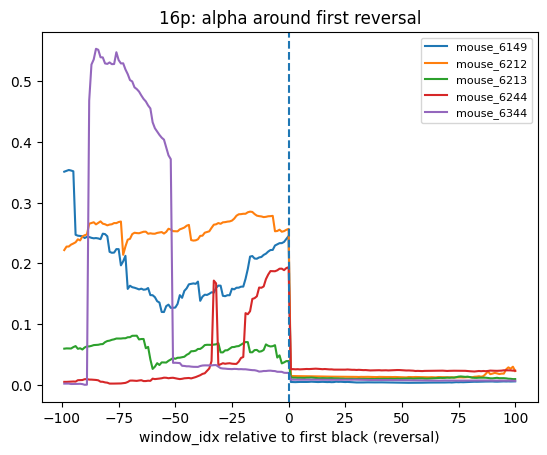

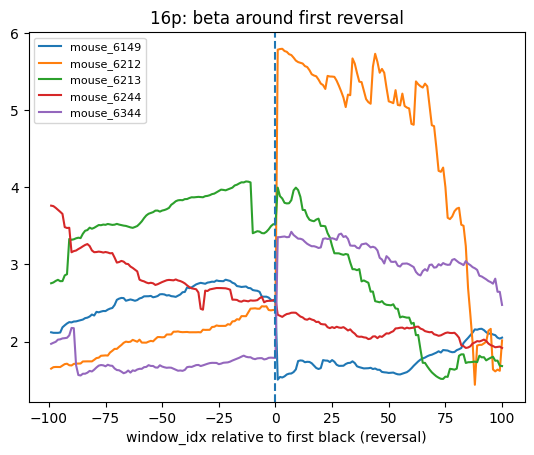

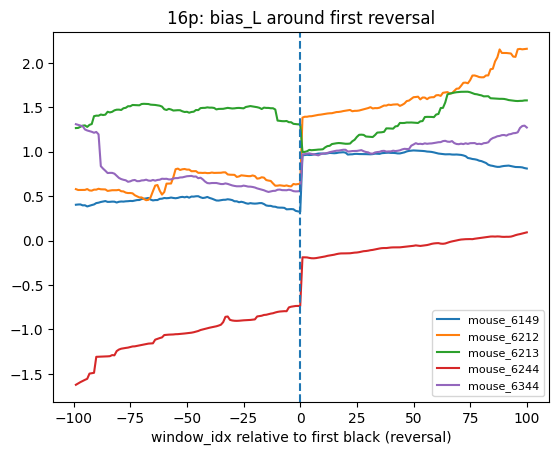

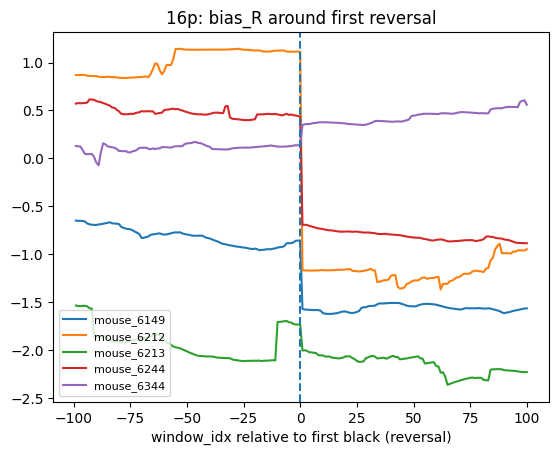

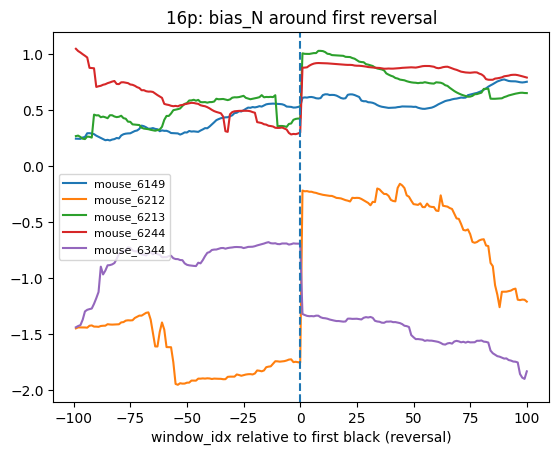

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BEFORE = 99
AFTER  = 100
REL_INDEX = pd.Index(range(-BEFORE, AFTER + 1), name="rel_idx")

PARAM_COLS = ["alpha", "beta", "bias_L", "bias_R", "bias_N"]

def extract_reversal_neighborhood(df, before=BEFORE, after=AFTER, color_value="black"):
    """
    Returns a DataFrame indexed by rel_idx in [-before, ..., 0, ..., +after]
    containing the parameter columns. Missing rel_idx are NaN.
    """
    mask = df["color"].eq(color_value)
    if not mask.any():
        return None  # no reversal marker

    black_pos = np.flatnonzero(mask.to_numpy())[0]  # first black row POSITION
    start = max(0, black_pos - before)
    end   = min(len(df) - 1, black_pos + after)

    sl = df.iloc[start:end+1].copy()

    # rel_idx: 0 at the first black row
    sl["rel_idx"] = sl.index.to_numpy() - black_pos
    sl = sl.set_index("rel_idx")

    # align to full neighborhood; missing become NaN by default when reindexing
    sl = sl.reindex(REL_INDEX)  # :contentReference[oaicite:2]{index=2}

    return sl[PARAM_COLS]

def plot_param_overlay(param_neighborhoods, param_name, title):
    """
    param_neighborhoods: dict tag -> DataFrame indexed by rel_idx with PARAM_COLS
    """
    plt.figure()
    for tag, neigh in param_neighborhoods.items():
        if neigh is None:
            continue
        plt.plot(neigh.index, neigh[param_name], label=tag)
    plt.axvline(0, linestyle="--")  # mark reversal (first black) :contentReference[oaicite:3]{index=3}
    plt.xlabel("window_idx relative to first black (reversal)")
    plt.title(title)
    plt.legend(fontsize=8)  # label each mouse line :contentReference[oaicite:4]{index=4}
    plt.show()

# ---- choose which group to plot ----
mousetype_to_plot = "16p"  # or "WT" / "16p"

# Build neighborhood dict: tag -> neighborhood DataFrame
neigh = {}
for tag, df in param_estimates[mousetype_to_plot].items():
    neigh[tag] = extract_reversal_neighborhood(df)

# Make 5 plots (one per parameter)
for p in PARAM_COLS:
    plot_param_overlay(
        neigh,
        p,
        title=f"{mousetype_to_plot}: {p} around first reversal"
    )